In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns # For Visualization 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("flight_dataset.xlsx")
dfToProcess=df
x=df.iloc[:,:-1].values
y=df.iloc[:,5].values
df

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
1,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"
...,...,...,...,...,...,...
994,25.12.2023,Pegasus,SAW,VAN,130,"1484,99"
995,25.12.2023,Anadolujet,SAW,VAN,125,"1509,99"
996,25.12.2023,Sunexpress,ADB,KSY,130,"1614,99"
997,25.12.2023,Sunexpress,ADB,ASR,90,"1364,99"


In [3]:
print("\nOverview of the dataset:")
df.describe(include='all').T



Overview of the dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Flight Date,999,6,21.12.2023,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airline,999,4,Anadolujet,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
From,999,14,SAW,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
To,999,25,SAW,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Duration (min),999.0,NaN,NaN,NaN,93.813814,19.537984,60.0,80.0,90.0,110.0,135.0
Price,999,158,"1149,99",67,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [4]:
#We're checking if there is null value in columns
df.isnull()

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
994,False,False,False,False,False,False
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False


Duplicated rows count: 250


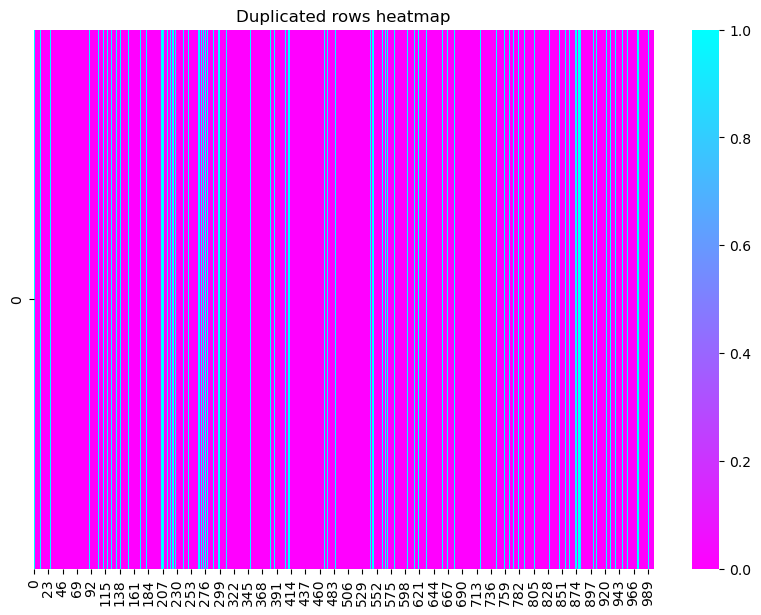

In [5]:
duplicated_rows = df[df.duplicated(keep=False)]
print("Duplicated rows count:", duplicated_rows.shape[0])

heatmap_data = df.duplicated().values
plt.figure(figsize=(10, 7))
sns.heatmap([heatmap_data], cmap='cool_r')
plt.title('Duplicated rows heatmap')
plt.show()


We have so many duplicated row, we have to delete these.

In [6]:
#Drop duplicate datas
dfToProcess=dfToProcess.drop_duplicates()
dfToProcess

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"
5,20.12.2023,Türk Hava Yolları,ADA,IST,110,"1492,99"
...,...,...,...,...,...,...
994,25.12.2023,Pegasus,SAW,VAN,130,"1484,99"
995,25.12.2023,Anadolujet,SAW,VAN,125,"1509,99"
996,25.12.2023,Sunexpress,ADB,KSY,130,"1614,99"
997,25.12.2023,Sunexpress,ADB,ASR,90,"1364,99"


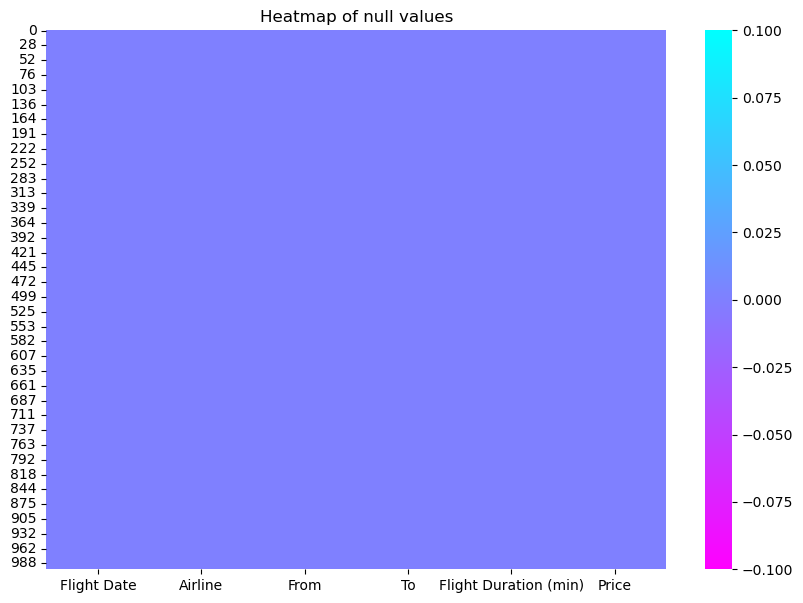

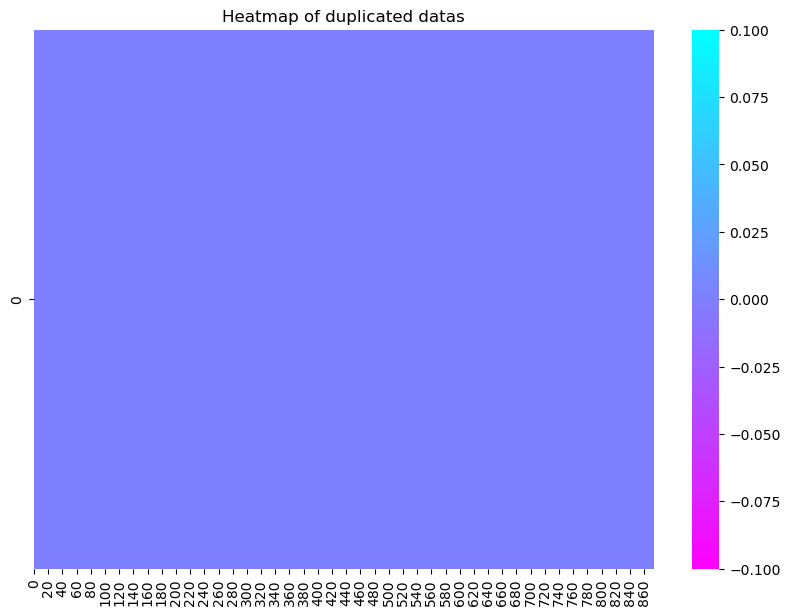

In [7]:
#Dataset doesn't contain null values.
plt.figure(figsize=(10,7))
sns.heatmap(dfToProcess.isnull(), cmap= 'cool_r')
plt.title('Heatmap of null values')
plt.show()

#Dataset doesn't contain duplicated values anymore.
heatmap_data = dfToProcess.duplicated().values
plt.figure(figsize=(10, 7))
sns.heatmap([heatmap_data], cmap='cool_r')
plt.title('Heatmap of duplicated datas')
plt.show()


In [8]:
df['Price'].unique()

array(['936,99', '1264,99', '1464,99', '1579,99', '1492,99', '1599,99',
       '1144,99', '1354,99', '1379,99', '1313,99', '1314,99', '1364,99',
       '1401,99', '630,99', '642,99', '741,99', '1050,99', '1149,99',
       '841,99', '941,99', '1297,99', '641,99', '992,99', '1150,99',
       '1148,99', '1249,99', '1514,99', '884,99', '590,99', '643,99',
       '1114,99', '1214,99', '1737,99', '1614,99', '1664,99', '1292,99',
       '1329,99', '1192,99', '1699,99', '1244,99', '1478,99', '1479,99',
       '1710,99', '1919,99', '1392,99', '1142,99', '1045,99', '784,99',
       '991,99', '1397,99', '1034,99', '1197,99', '1497,99', '1704,99',
       '559,99', '719,99', '1147,99', '679,99', '843,99', '993,99',
       '943,99', '1031,99', '966,99', '1385,99', '1334,99', '1585,99',
       '1338,99', '1359,99', '1047,99', '1486,99', '836,99', '1519,99',
       '1164,99', '1328,99', '1725,99', '670,99', '842,99', '1386,99',
       '1564,99', '578,99', '586,99', '1485,99', '1042,99', '1504,99',
   

In [9]:
df.head()

,Flight Date,Airline,From,To,Flight Duration (min),Price
0,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
1,20.12.2023,Anadolujet,ADA,ESB,65,"936,99"
2,20.12.2023,Sunexpress,ADA,AYT,75,"1264,99"
3,20.12.2023,Sunexpress,ADA,AYT,75,"1464,99"
4,20.12.2023,Pegasus,ADA,AYT,65,"1579,99"


In [10]:
df["Airline"].value_counts()


Airline
Anadolujet           367
Pegasus              261
Türk Hava Yolları    254
Sunexpress           117
Name: count, dtype: int64

In [11]:
print(df['Airline'].unique())
print(df['From'].unique())
print(df['To'].unique())



['Anadolujet' 'Sunexpress' 'Pegasus' 'Türk Hava Yolları']
['ADA' 'ESB' 'AYT' 'GZP' 'EDO' 'DIY' 'EZS' 'ERZ' 'GZT' 'HTY' 'IST' 'SAW'
 'ADB' 'TZX']
['ESB' 'AYT' 'IST' 'SAW' 'ADB' 'VAN' 'GZP' 'DIY' 'EZS' 'ERZ' 'GZT' 'KSY'
 'MLX' 'BJV' 'OGU' 'RZV' 'GNY' 'TZX' 'ASR' 'SZF' 'KYA' 'DLM' 'NAV' 'NOP'
 'VAS']


In [12]:
print(df['Flight Date'].isnull().values.any())
print(df['Airline'].isnull().values.any())
print(df['From'].isnull().values.any())
print(df['To'].isnull().values.any())
print(df['Flight Duration (min)'].isnull().values.any())

False
False
False
False
False


## Encoding Dates

In [13]:
dfToProcess['Flight Date'] = pd.to_datetime(dfToProcess['Flight Date'], format='%d.%m.%Y', dayfirst=True)
dfToProcess['DayOfWeek']=dfToProcess['Flight Date'].dt.dayofweek
dfToProcess.drop('Flight Date',axis=1,inplace=True)
dfToProcess = pd.get_dummies(dfToProcess, columns=["DayOfWeek"], dtype=int)
dfToProcess


,Airline,From,To,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,Anadolujet,ADA,ESB,65,"936,99",0,1,0,0,0,0
2,Sunexpress,ADA,AYT,75,"1264,99",0,1,0,0,0,0
3,Sunexpress,ADA,AYT,75,"1464,99",0,1,0,0,0,0
4,Pegasus,ADA,AYT,65,"1579,99",0,1,0,0,0,0
5,Türk Hava Yolları,ADA,IST,110,"1492,99",0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,Pegasus,SAW,VAN,130,"1484,99",1,0,0,0,0,0
995,Anadolujet,SAW,VAN,125,"1509,99",1,0,0,0,0,0
996,Sunexpress,ADB,KSY,130,"1614,99",1,0,0,0,0,0
997,Sunexpress,ADB,ASR,90,"1364,99",1,0,0,0,0,0


#### Why we used dummy for dates?

We could have used day of week as index. for example 0 for Monday if we do like this, machine could find wrong relative between columns. Like ratio etc. and it's undesirable

## Processing for Price Column

In [14]:
dfToProcess['Price']=dfToProcess['Price'].str.replace(',', '.').astype(float)
dfToProcess

,Airline,From,To,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,Anadolujet,ADA,ESB,65,936.99,0,1,0,0,0,0
2,Sunexpress,ADA,AYT,75,1264.99,0,1,0,0,0,0
3,Sunexpress,ADA,AYT,75,1464.99,0,1,0,0,0,0
4,Pegasus,ADA,AYT,65,1579.99,0,1,0,0,0,0
5,Türk Hava Yolları,ADA,IST,110,1492.99,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
994,Pegasus,SAW,VAN,130,1484.99,1,0,0,0,0,0
995,Anadolujet,SAW,VAN,125,1509.99,1,0,0,0,0,0
996,Sunexpress,ADB,KSY,130,1614.99,1,0,0,0,0,0
997,Sunexpress,ADB,ASR,90,1364.99,1,0,0,0,0,0


## Encoding with Dummy

In [15]:
dfToProcess = pd.get_dummies(dfToProcess, columns=["Airline","From","To"], dtype=int)
dfToProcess

,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Airline_Anadolujet,Airline_Pegasus,...,To_MLX,To_NAV,To_NOP,To_OGU,To_RZV,To_SAW,To_SZF,To_TZX,To_VAN,To_VAS
0,65,936.99,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,75,1264.99,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,75,1464.99,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,65,1579.99,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,110,1492.99,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,130,1484.99,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
995,125,1509.99,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
996,130,1614.99,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,90,1364.99,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# VISUALIZATION

Flight Price Distrubition

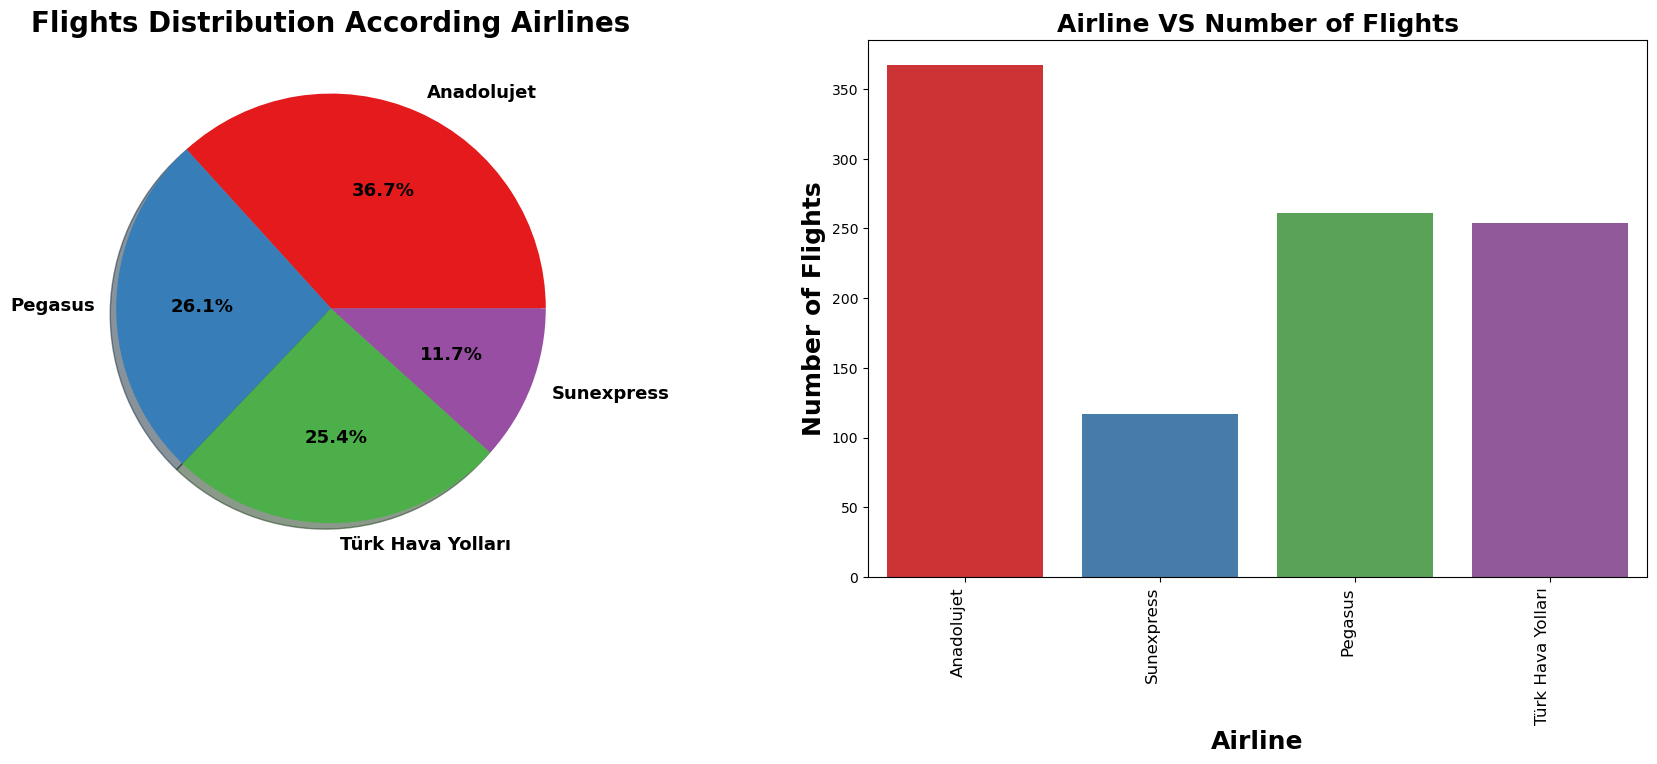

In [16]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
df['Airline'].value_counts().plot.pie(
    autopct='%2.1f%%',
    textprops={'fontsize': 13, 'fontweight': 'bold'},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Flights Distribution According Airlines', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Airline', data=df, ax=ax[1])  # Specify 'x' parameter
ax[1].set_title('Airline VS Number of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Airline", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Number of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90, ha='right')
plt.tight_layout(pad=2)
plt.show()


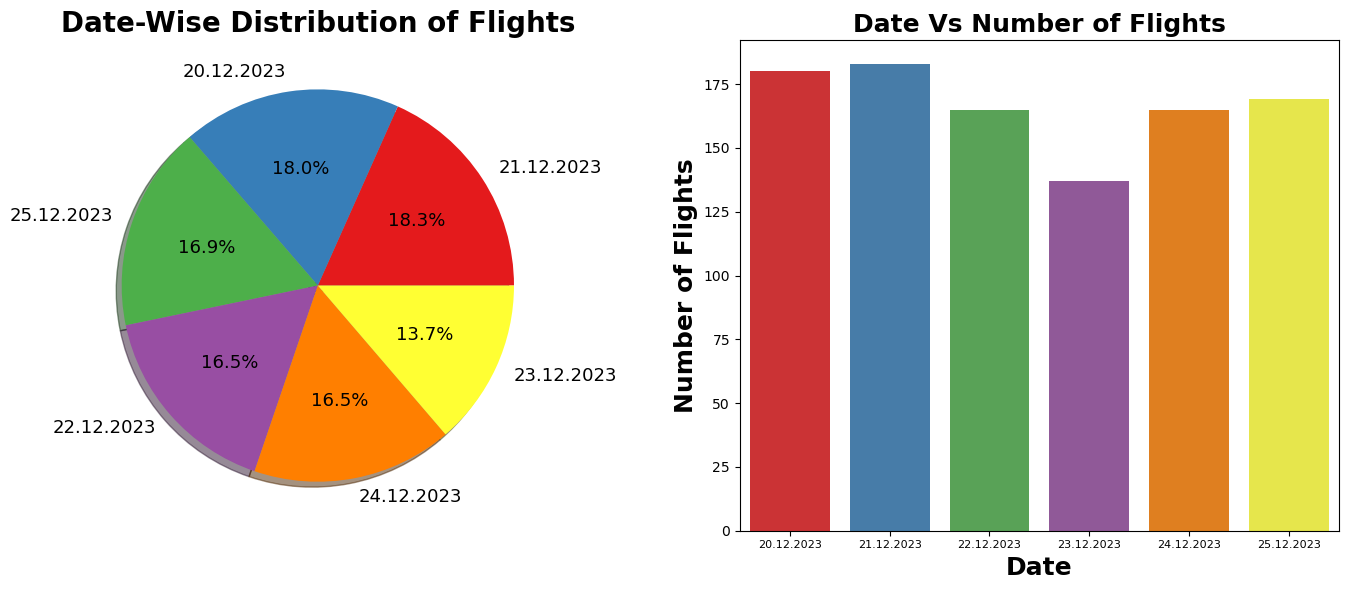

In [17]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
df['Flight Date'].value_counts().plot.pie(
    autopct='%2.1f%%',
    textprops={'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Date-Wise Distribution of Flights', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')
df
# Count plot
sns.countplot(x='Flight Date', data=df, ax=ax[1])
ax[1].set_title('Date Vs Number of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Date", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Number of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()


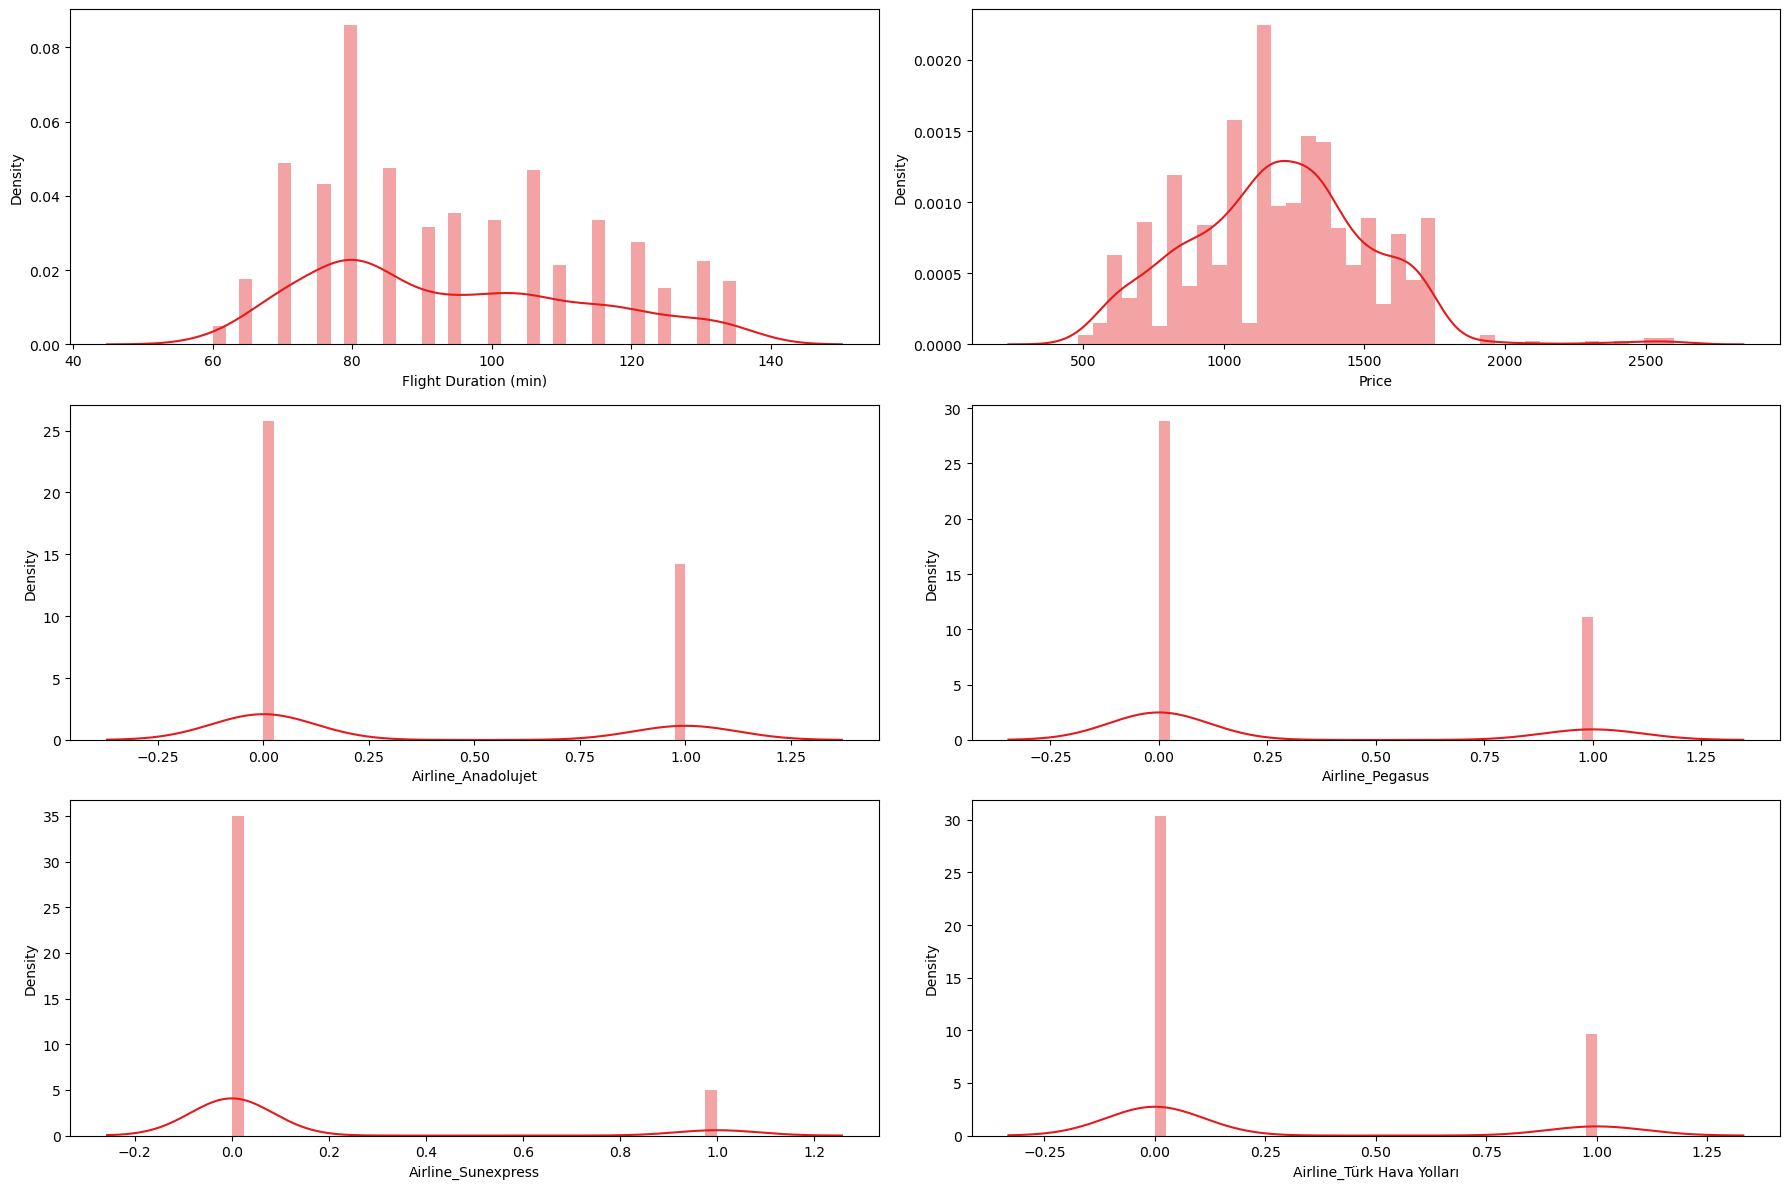

In [18]:
columns = ['Flight Duration (min)','Price','Airline_Anadolujet','Airline_Pegasus','Airline_Sunexpress','Airline_Türk Hava Yolları']


def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.distplot(dfToProcess[columns[index]], ax=ax[i][j], bins=40)
            index+=1

        
distplot(3, 2, columns)

Actually its hard to get meaning from encoded data like airline columns. But we can consider it like there is flight or no-flight ratio via looking to depth between 1 and 0.

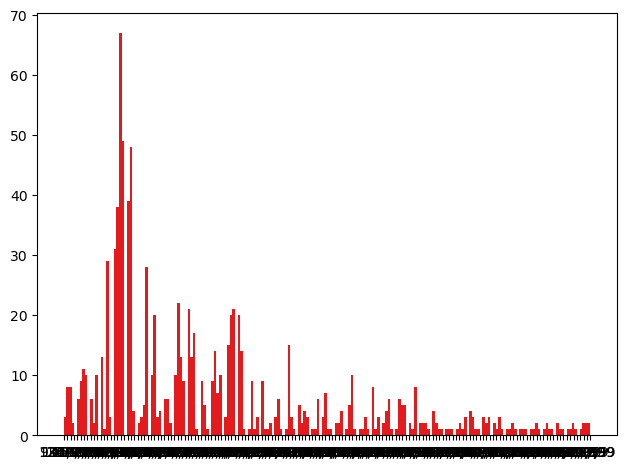

In [19]:
# noise histogram
plt.figure()
plt.hist(df['Price'], bins=200)
plt.show()

<Axes: >

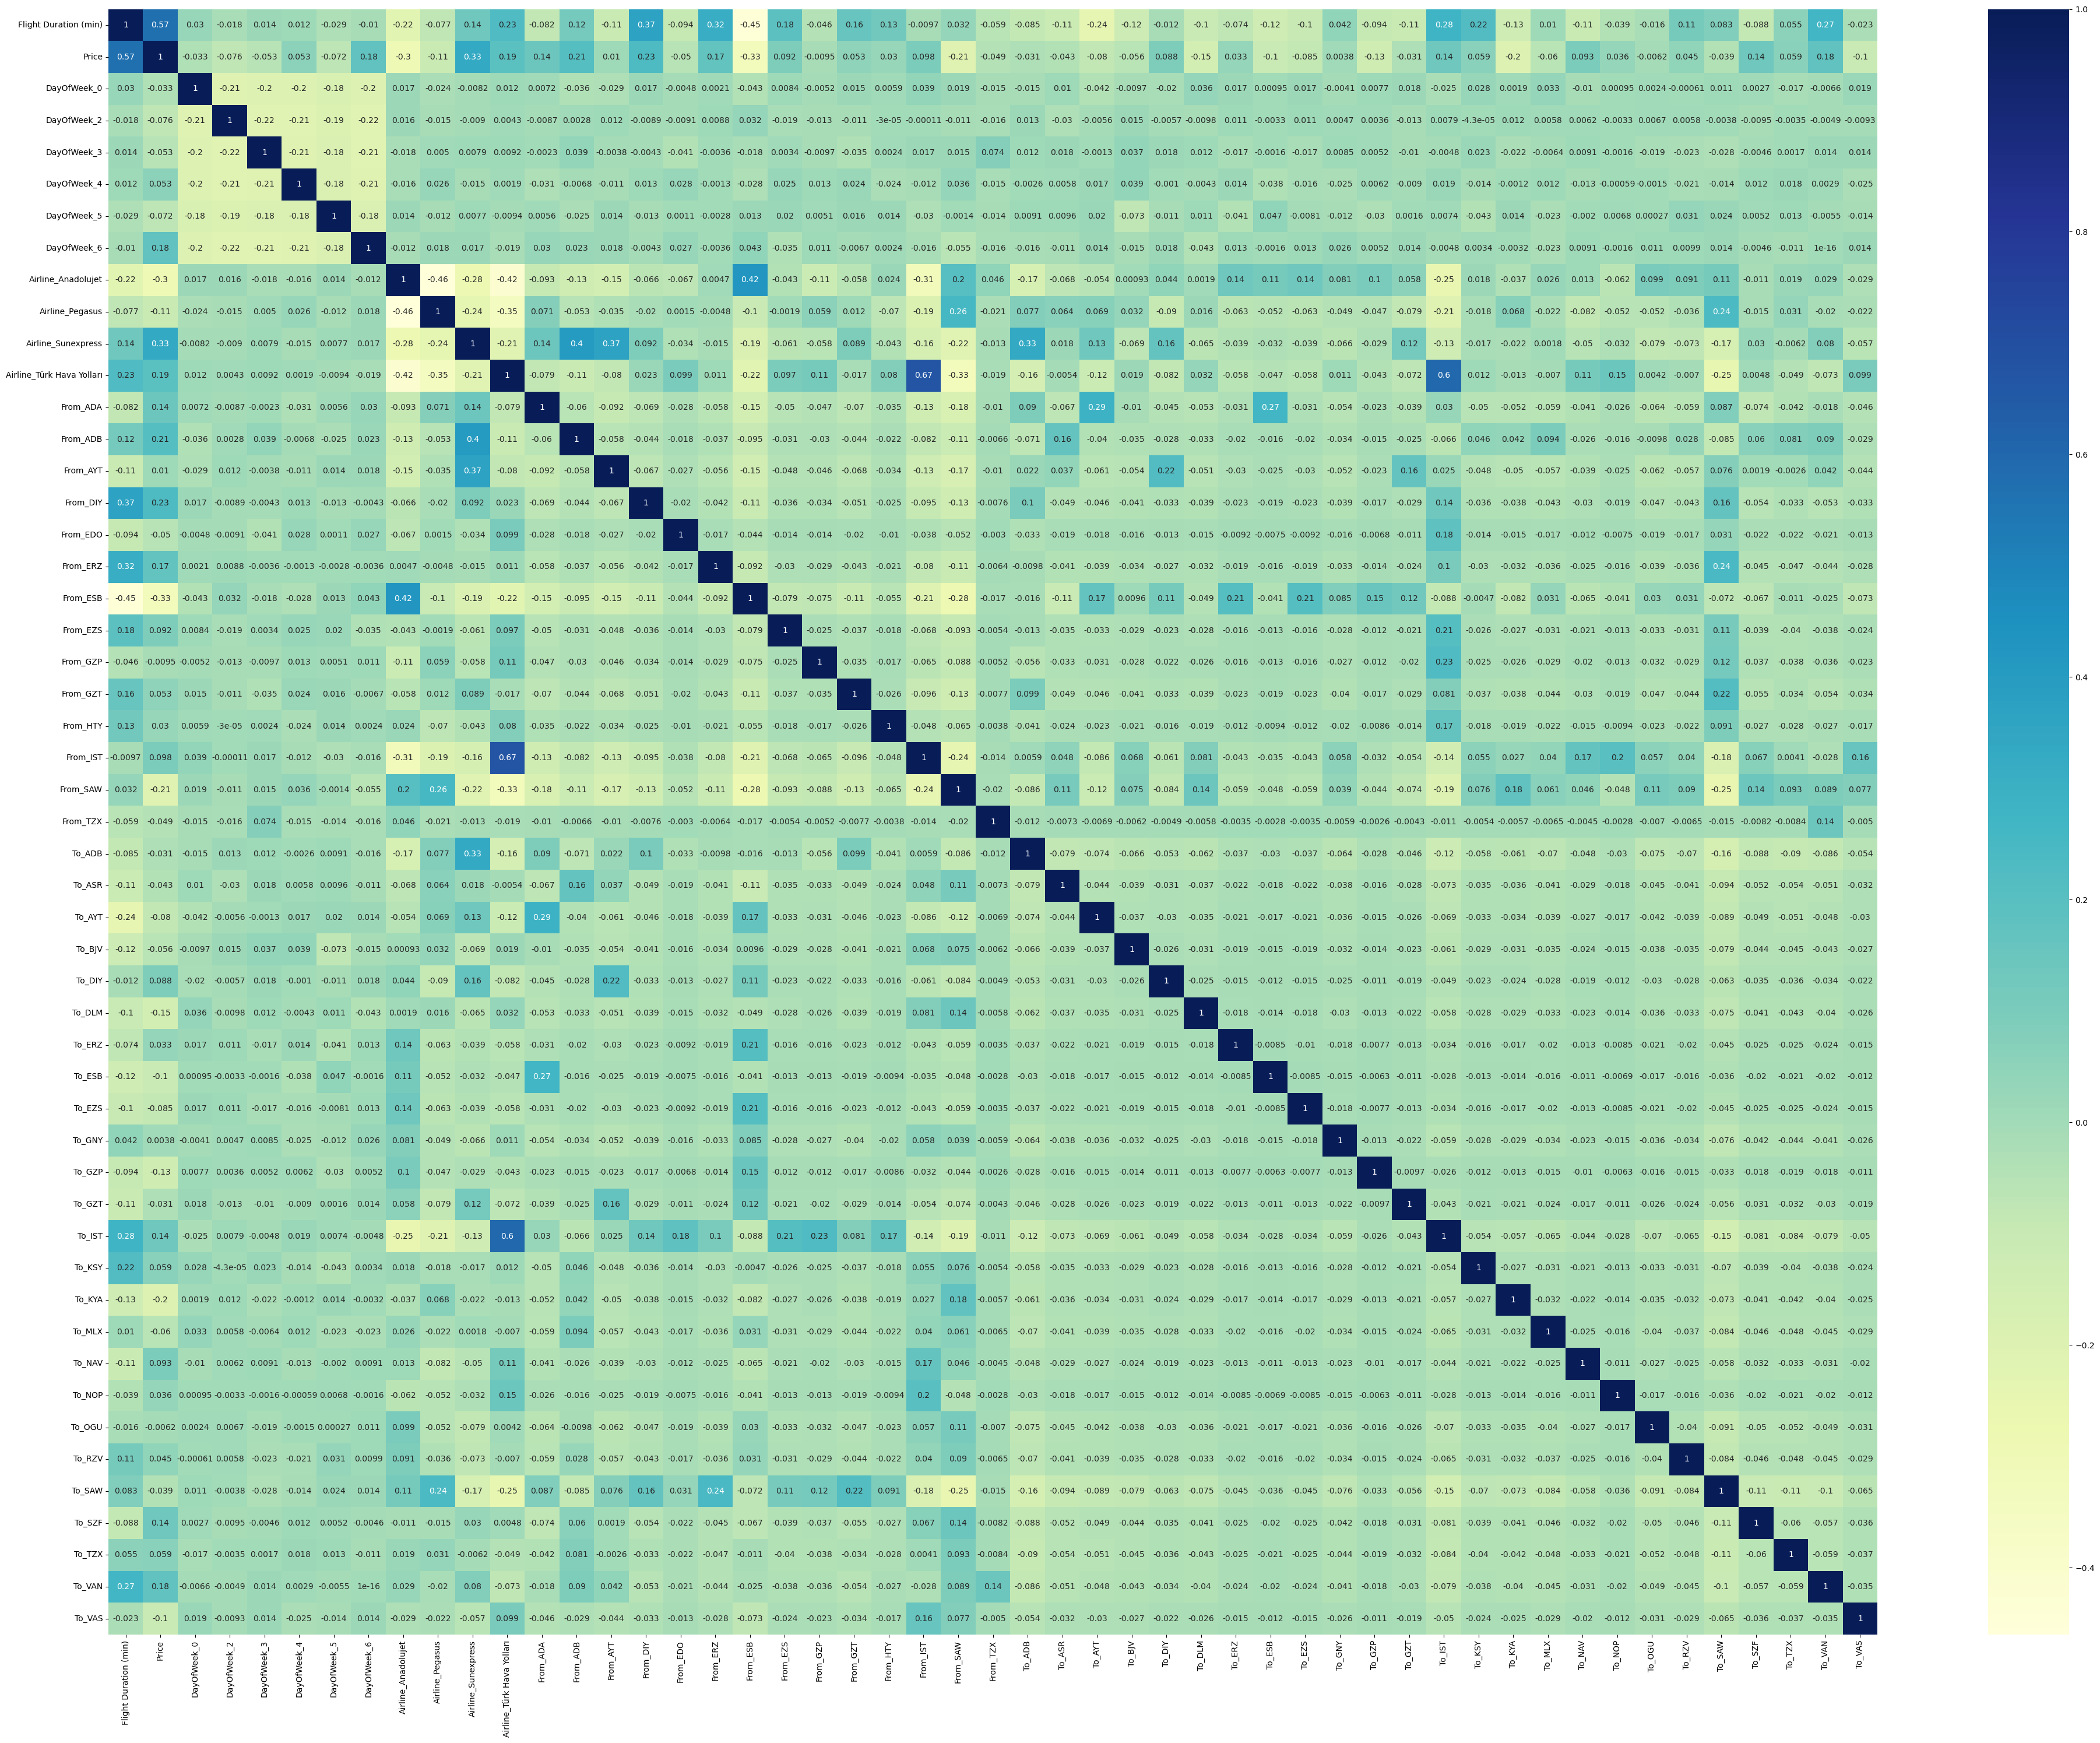

In [20]:
# Correlation of attributes via heatmap
plt.figure(figsize=(40,30))
corr_matrix = dfToProcess.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [22]:
dfToProcess.corr()


,Flight Duration (min),Price,DayOfWeek_0,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,Airline_Anadolujet,Airline_Pegasus,...,To_MLX,To_NAV,To_NOP,To_OGU,To_RZV,To_SAW,To_SZF,To_TZX,To_VAN,To_VAS
Flight Duration (min),1.000000,0.571959,0.030027,-0.018327,0.014364,0.011630,-0.028649,-1.033675e-02,-0.224886,-0.076706,...,0.010166,-0.108974,-0.038799,-0.015750,0.112984,0.082568,-0.088094,0.054829,2.686722e-01,-0.023421
Price,0.571959,1.000000,-0.033470,-0.076307,-0.053029,0.053261,-0.072091,1.762542e-01,-0.299017,-0.109869,...,-0.059789,0.093252,0.035627,-0.006170,0.044817,-0.038878,0.135452,0.058967,1.762843e-01,-0.103934
DayOfWeek_0,0.030027,-0.033470,1.000000,-0.207699,-0.202089,-0.198862,-0.176557,-2.020886e-01,0.017076,-0.024096,...,0.032925,-0.010438,0.000946,0.002357,-0.000614,0.010605,0.002742,-0.017017,-6.579707e-03,0.019420
DayOfWeek_2,-0.018327,-0.076307,-0.207699,1.000000,-0.216371,-0.212916,-0.189034,-2.163708e-01,0.016144,-0.014610,...,0.005779,0.006192,-0.003288,0.006728,0.005779,-0.003793,-0.009533,-0.003518,-4.893394e-03,-0.009285
DayOfWeek_3,0.014364,-0.053029,-0.202089,-0.216371,1.000000,-0.207165,-0.183928,-2.105263e-01,-0.018380,0.004980,...,-0.006386,0.009095,-0.001589,-0.019152,-0.022706,-0.027553,-0.004609,0.001680,1.351845e-02,0.014400
DayOfWeek_4,0.011630,0.053261,-0.198862,-0.212916,-0.207165,1.000000,-0.180991,-2.071647e-01,-0.015905,0.026224,...,0.012380,-0.012685,-0.000592,-0.001475,-0.020608,-0.014199,0.011675,0.017750,2.876236e-03,-0.025467
DayOfWeek_5,-0.028649,-0.072091,-0.176557,-0.189034,-0.183928,-0.180991,1.000000,-1.839282e-01,0.014420,-0.012141,...,-0.023137,-0.001955,0.006794,0.000267,0.030597,0.023646,0.005158,0.013276,-5.466025e-03,-0.014322
DayOfWeek_6,-0.010337,0.176254,-0.202089,-0.216371,-0.210526,-0.207165,-0.183928,1.000000e+00,-0.012071,0.018455,...,-0.022706,0.009095,-0.001589,0.011227,0.009934,0.013598,-0.004609,-0.011198,1.022063e-16,0.014400
Airline_Anadolujet,-0.224886,-0.299017,0.017076,0.016144,-0.018380,-0.015905,0.014420,-1.207051e-02,1.000000,-0.460076,...,0.025919,0.012515,-0.061639,0.099055,0.090569,0.113086,-0.010762,0.019494,2.874839e-02,-0.028521
Airline_Pegasus,-0.076706,-0.109869,-0.024096,-0.014610,0.004980,0.026224,-0.012141,1.845508e-02,-0.460076,1.000000,...,-0.022353,-0.082004,-0.051595,-0.051520,-0.036160,0.237260,-0.015083,0.030727,-2.046562e-02,-0.022461


# Training & Test Data Split


In [45]:
#Required libraries 
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [46]:
#Data Spliting as Train-Test
from sklearn.model_selection import train_test_split
X = dfToProcess.drop(['Price'], axis=1)
Y = dfToProcess['Price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=8 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)


x_train : (655, 50)
x_test : (219, 50)
y_train : (655,)
y_test : (219,)


# Training

In [47]:
from sklearn.linear_model import LinearRegression

<b>Lineer Regression Algorithm</b>

In [48]:
# Lineer Regression Train
lr = LinearRegression()
lr.fit(x_train,y_train)
# 
y_predict = lr.predict(x_test) # testing lr model
y_predict  #predicted values


array([1299.71099646,  882.91480246,  772.98741993, 1026.55816131,
       1875.16192811,  858.9386586 ,  862.87482873, 1184.2420989 ,
       1196.84899164, 1583.56292605, 1542.62994696, 1019.53587455,
        741.46785715, 1284.09573738, 1177.78465325, 1562.23620533,
       1104.8315983 , 1497.67911762, 1475.0014689 , 1165.68900352,
       1282.16759024,  978.55496502,  821.60146637, 1238.85943995,
        871.96668206,  974.77771916, 1512.4576744 ,  864.80297587,
        949.79867563, 1161.4181964 , 1368.0649635 , 1155.60576392,
       1470.27566826, 1113.89890913, 1106.47541784, 1470.36812222,
       1679.69797833, 1148.84237646, 1471.10990749, 1433.9690005 ,
       1546.00593501, 1045.29257455, 1113.89890913,  679.94383   ,
       1469.57263539, 1288.7938825 , 1140.43518742, 1583.96330033,
        760.35232254, 1288.21128696, 1261.24125164,  767.51602873,
       1718.57504634,  780.12658362, 1434.84190504,  962.2979015 ,
        937.49737285,  710.35254737, 1125.72943668, 1471.45119

In [49]:
# metrics
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  150.22088090724066
 root mean squared error:  204.03783700900777
Coefficient of determination R^2:  0.6124621702210213


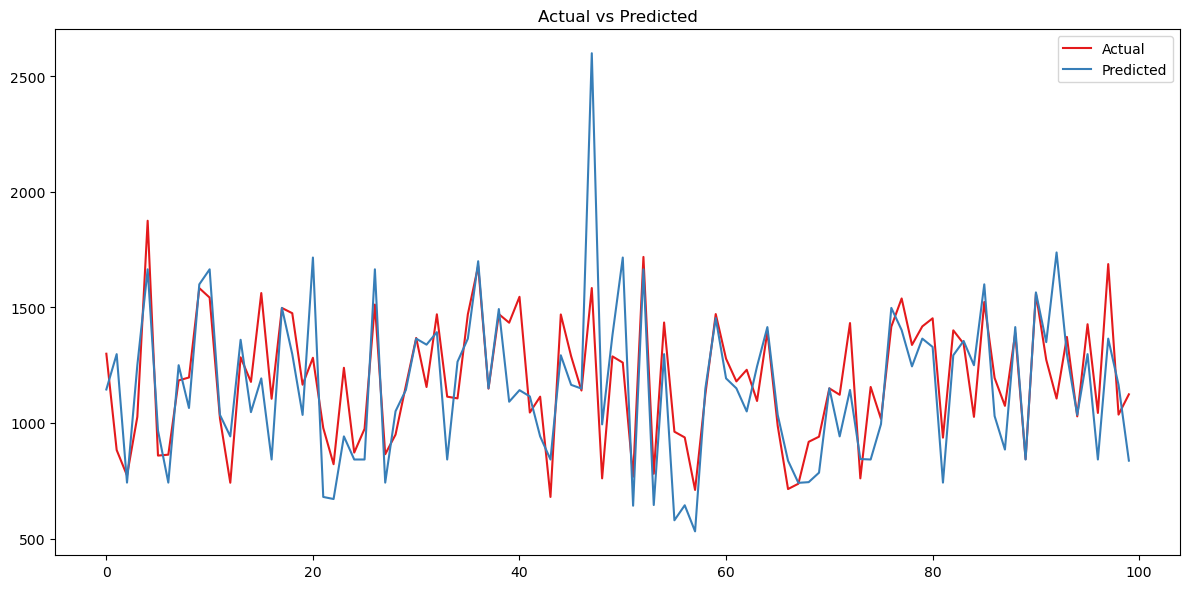

In [50]:
# predicted values VS real values
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>DecisionTree Algorithm</b>

mean absolute error:  141.7123287671233
 root mean squared error:  206.84650078220986
Coefficient of determination R^2:  0.6017195055237128


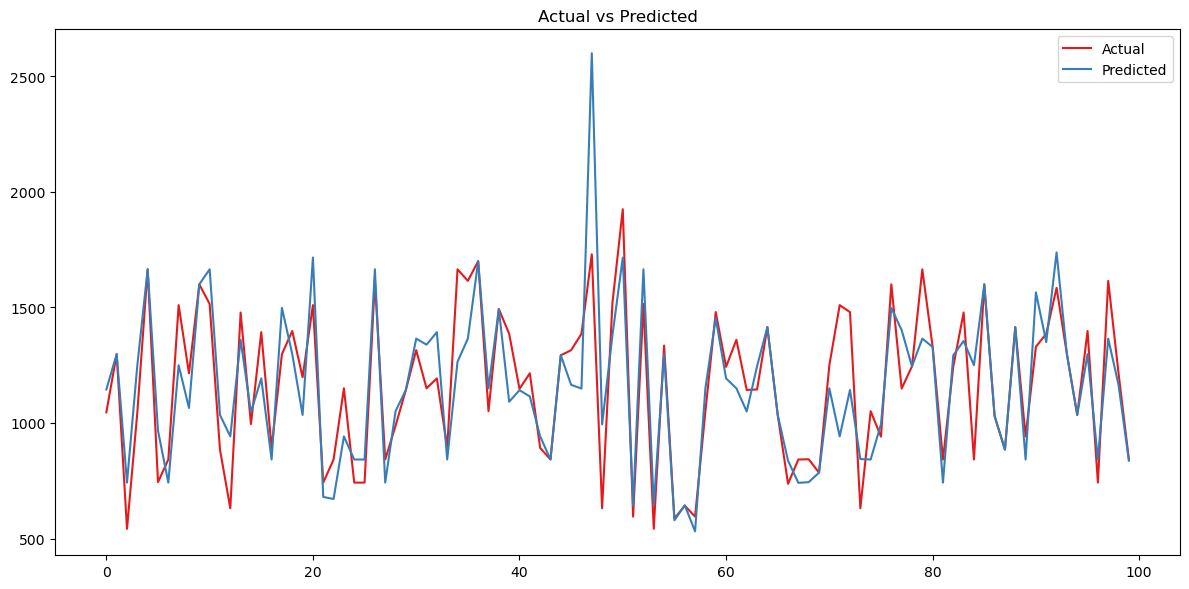

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='poisson',splitter='best')
dt.fit(x_train,y_train)
y_predict_dt = dt.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_dt))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_dt)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_dt))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


<b>Lasso Algorithm</b>

mean absolute error:  149.05778029051095
 root mean squared error:  203.5884030168009
Coefficient of determination R^2:  0.6141675485127077


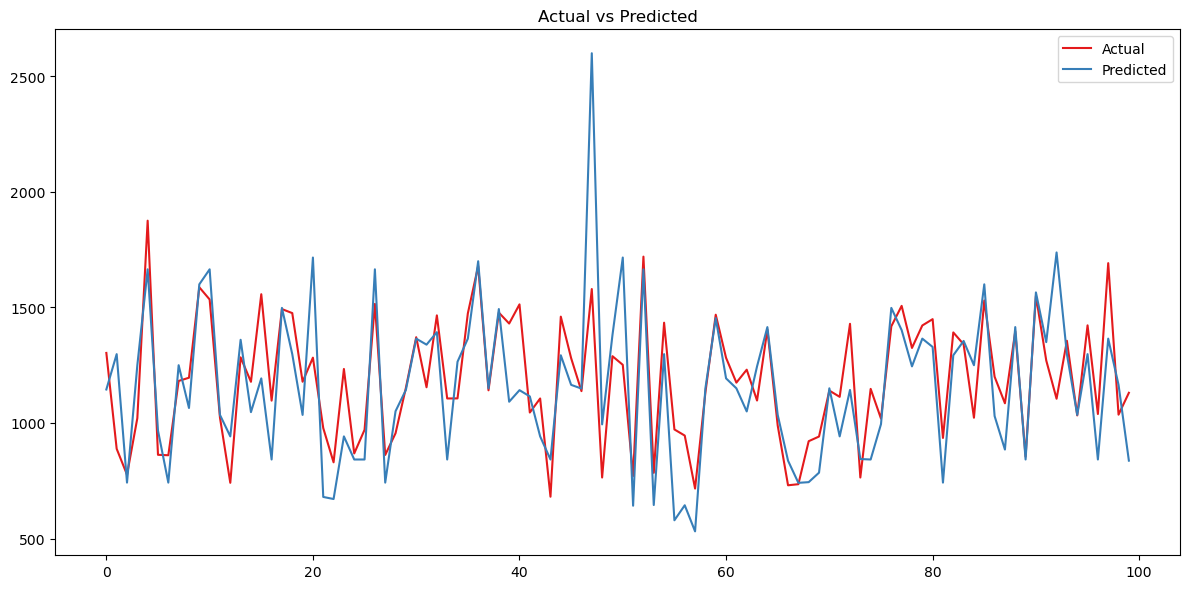

In [52]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))

# Lasso prediction visualization
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>RandomForest Algorithm</b>

mean absolute error:  122.61436221642391
root mean squared error:  172.58154920913083
Coefficient of determination R^2:  0.7227437101596816


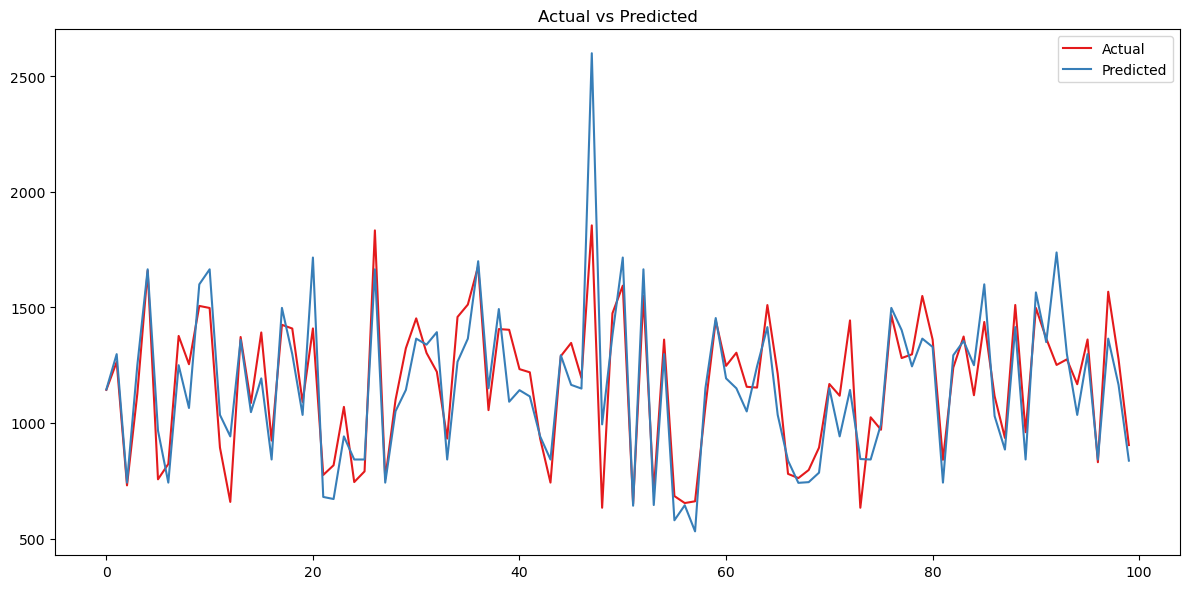

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

modelToServe=rf

<b>SVR (Support Vector Regression) Algorithm</b>

mean absolute error:  136.88818890715362
root mean squared error:  200.6487853543054
Coefficient of determination R^2:  0.6252291954753764


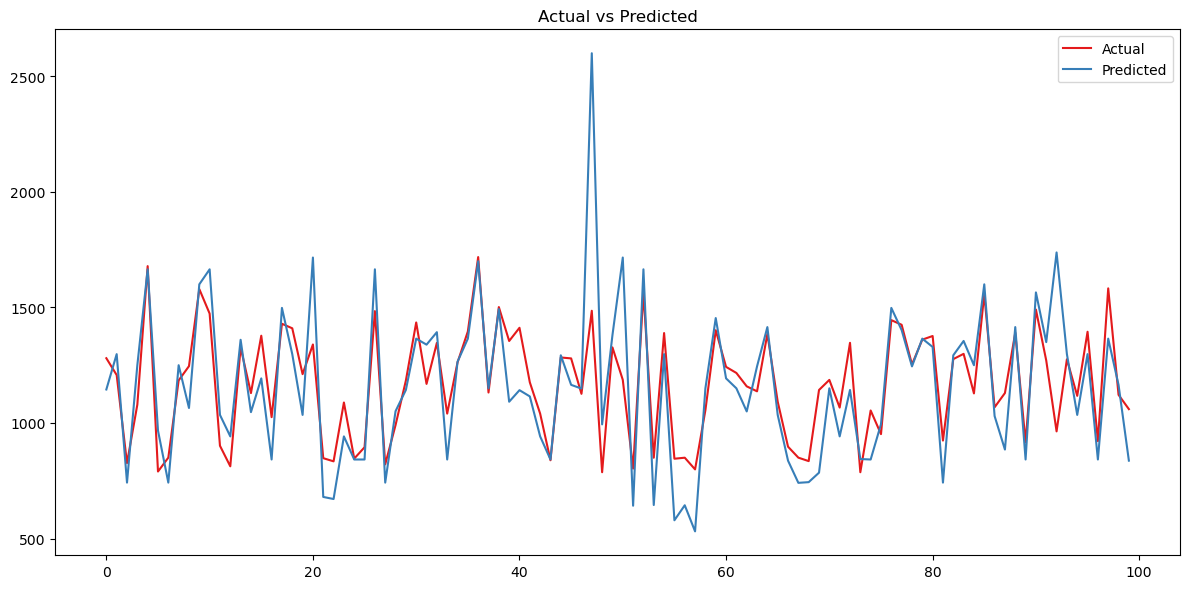

In [54]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()

model = make_pipeline(scaler, SVR(C=99.8, epsilon=8))
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))


fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()




<b>Ridge Algorithm</b>

mean absolute error:  149.44640504589648
root mean squared error:  204.04855187392016
Coefficient of determination R^2:  0.6124214667457681


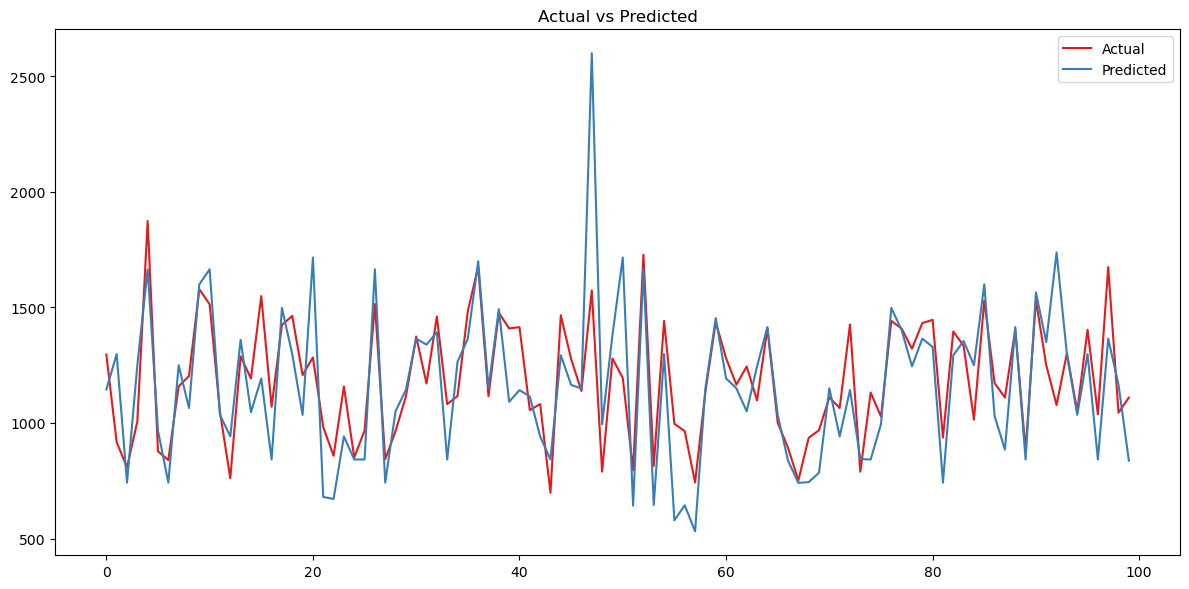

In [55]:
#Ridge
from sklearn.linear_model import Ridge
# training
model = Ridge(alpha=3)
model.fit(x_train, y_train)

# prediction
y_prediction = model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))


fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>ElasticNet Algorithm</b>

mean absolute error:  149.63371091676547
root mean squared error:  203.81826259655193
Coefficient of determination R^2:  0.6132958156476465


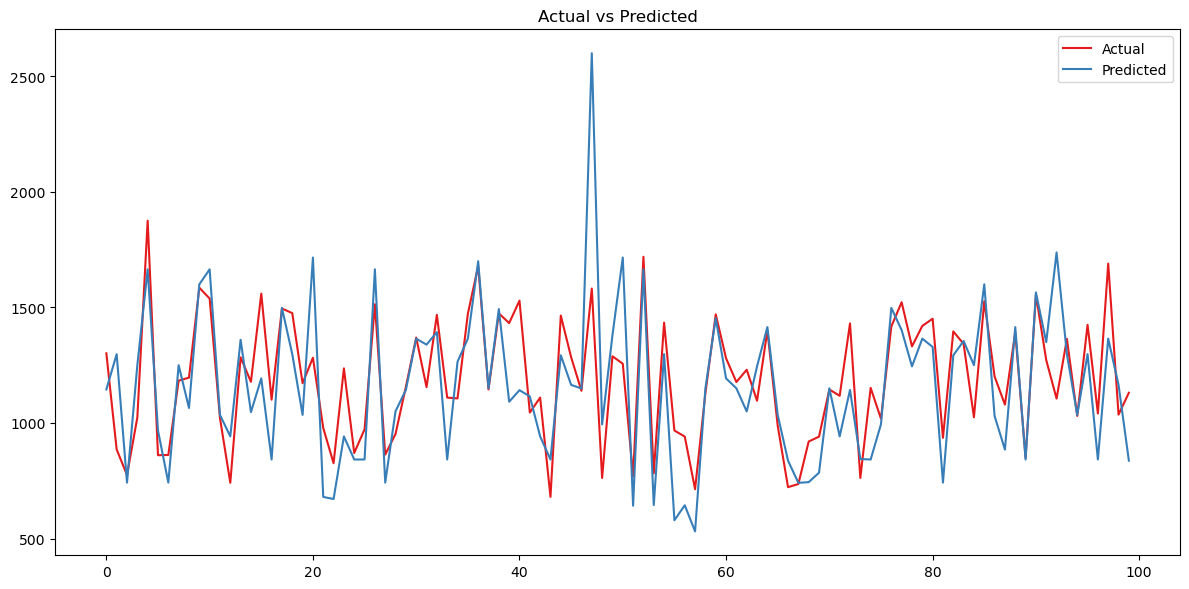

In [56]:
#ElasticNet
from sklearn.linear_model import ElasticNet

# training
model = ElasticNet(alpha=0.05, l1_ratio=1.00)
model.fit(x_train, y_train)

# prediction
y_prediction = model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>Xgboost Algorithm</b>

mean absolute error:  127.89541340031036
root mean squared error:  192.11602464846922
Coefficient of determination R^2:  0.6564263380221818


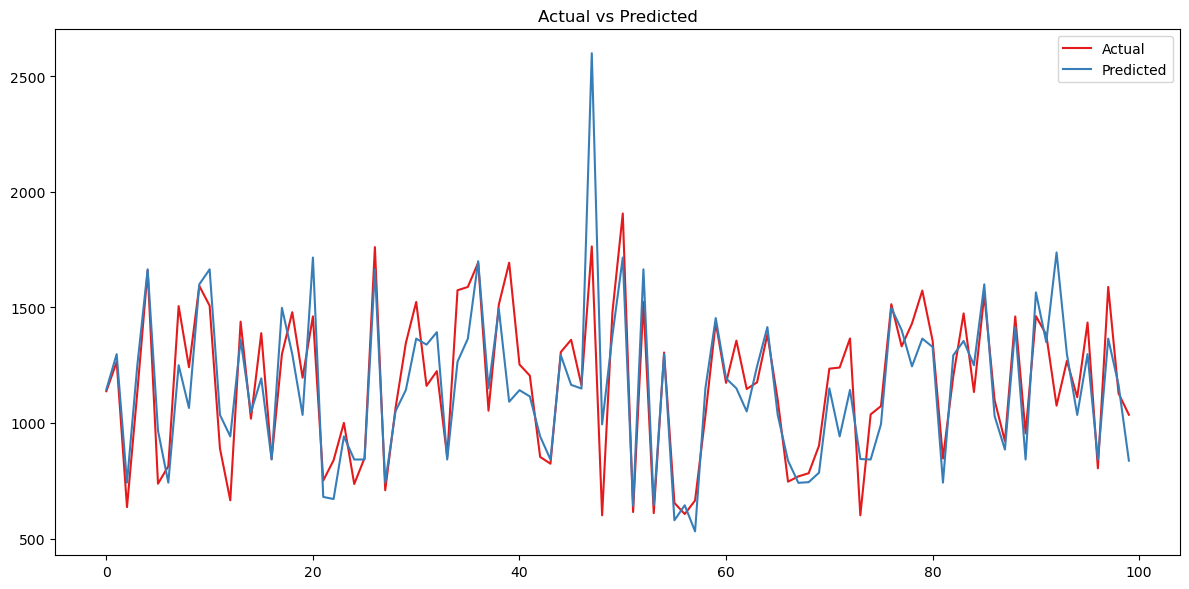

In [57]:
import xgboost as xgb

# training
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(x_train, y_train)

# prediction
y_prediction = model.predict(x_test)


print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

<b>KNN Algorithm</b>

mean absolute error:  140.02815829528157
root mean squared error:  204.23205923229787
Coefficient of determination R^2:  0.6117240298468779


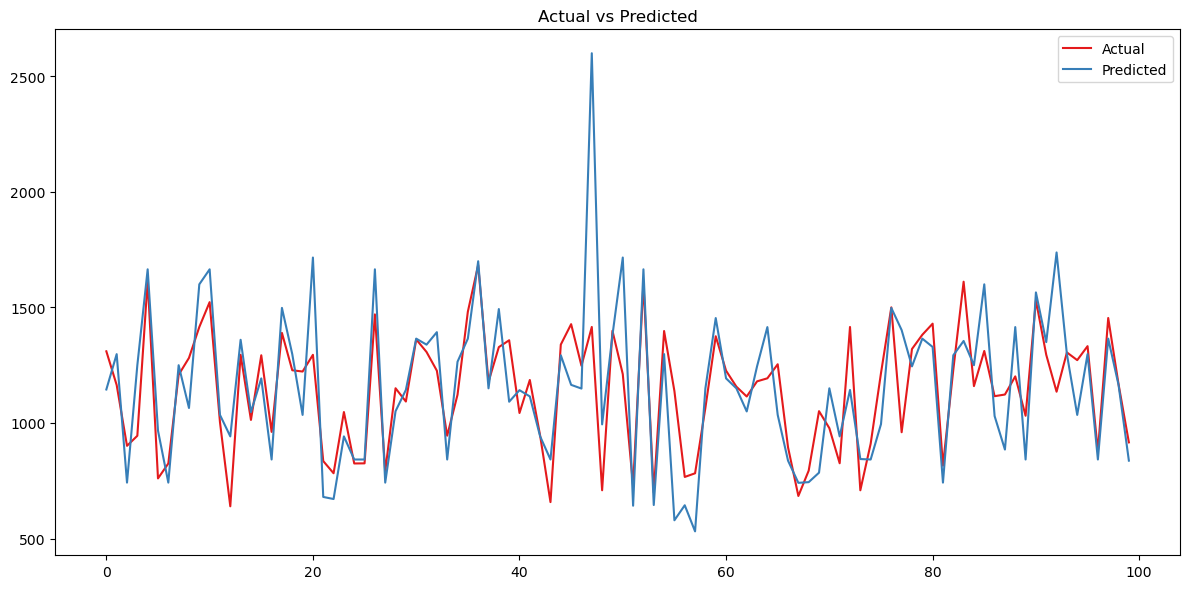

In [58]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=6)
model.fit(x_train, y_train)
y_prediction = model.predict(x_test)


print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


mean absolute error:  133.3840048348103
root mean squared error:  189.12215883448863
Coefficient of determination R^2:  0.6670511536808308


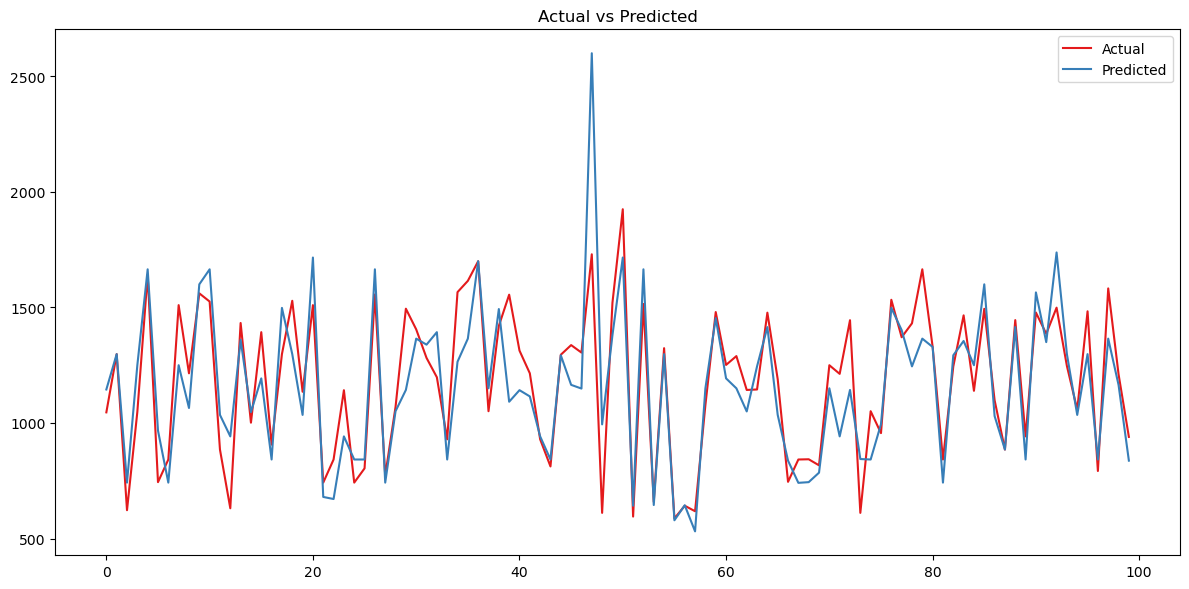

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=170, random_state=150)
# training
model.fit(x_train, y_train)

# prediction
y_prediction = model.predict(x_test)

print('mean absolute error: ',mean_absolute_error(y_test, y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_prediction))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_prediction,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()


In [61]:
final_RMSE = pd.DataFrame(data=[[204.037, 206.846, 203.588, 172.581, 200.648, 204.048, 203.818, 192.116, 204.232, 189.122],
                                 [0.612, 0.601, 0.614, 0.722, 0.625, 0.612, 0.613, 0.656, 0.611, 0.667]],
                           columns=['Linear Regression', 'Decision Tree Regressor', 'Lasso', 'Random Forest Regressor', 'SVR', 'Ridge', 'ElasticNet', 'Xgboost', 'KNN', 'Extra Trees Regressor'],
                           index=['RMSE', 'R2'])

final_RMSE = final_RMSE.T

cm = sns.light_palette('green', as_cmap=True)

final_RMSE = final_RMSE.style.background_gradient(cmap=cm)
final_RMSE

,RMSE,R2
Linear Regression,204.037000,0.612000
Decision Tree Regressor,206.846000,0.601000
Lasso,203.588000,0.614000
Random Forest Regressor,172.581000,0.722000
SVR,200.648000,0.625000
Ridge,204.048000,0.612000
ElasticNet,203.818000,0.613000
Xgboost,192.116000,0.656000
KNN,204.232000,0.611000
Extra Trees Regressor,189.122000,0.667000


# Fine Tuning Grid Search


We will implement this for Random Forest Regressor to find best results under best parameters.

In [63]:
from sklearn.model_selection import GridSearchCV
params_grid = {
    'n_estimators':[20,50,70,110,150,170,200,230,250],
    'max_leaf_nodes':list(range(2,25))}


grid_search = GridSearchCV(RandomForestRegressor(min_samples_split=2,bootstrap=False,random_state=42), params_grid, verbose=1, cv=3)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 207 candidates, totalling 621 fits


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(bootstrap=False, random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24],
                         'n_estimators': [20, 50, 70, 110, 150, 170, 200, 230,
                                          250]},
             verbose=1)

In [64]:
grid_search.best_params_

{'max_leaf_nodes': 24, 'n_estimators': 150}

mean absolute error:  144.9282430595255
root mean squared error:  194.63097309090062
Coefficient of determination R^2:  0.6473721664849788


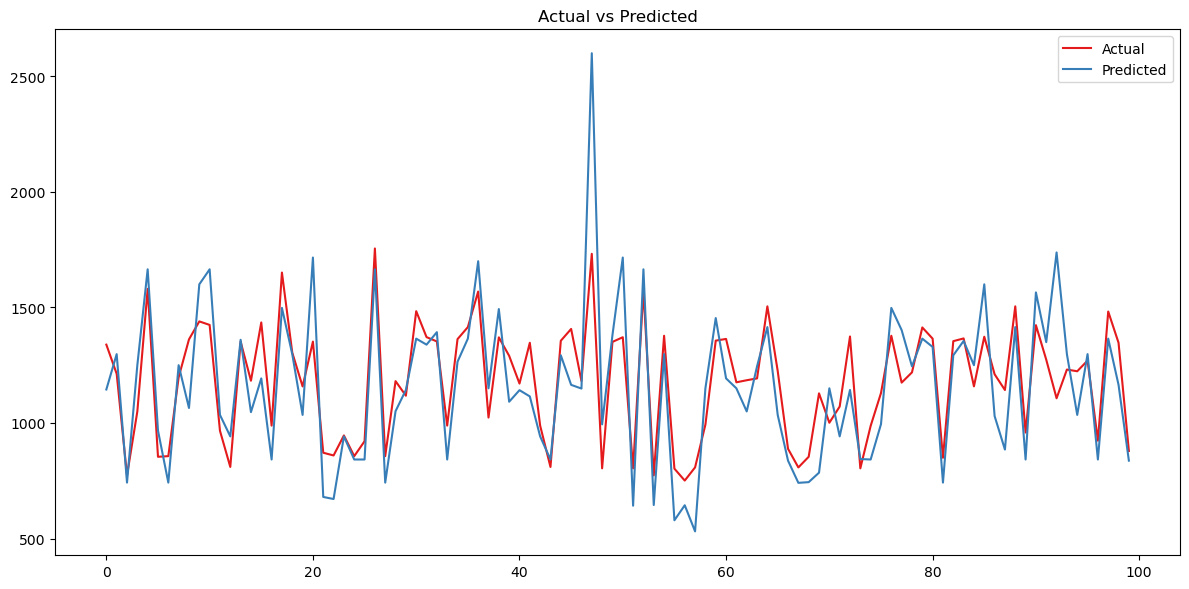

In [65]:

rf = RandomForestRegressor(n_estimators=150,max_leaf_nodes=24)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()



<b>IMPORTANT NOTE:</b> New parameters gave worse results. Increasing number of tree may give better results. But it will take so much time to find appropriate parameters, we will deploy it with RandomForest and previous parameters.

In [66]:
import pickle

We converted our model to pickle. By this way, we can use model as service on web app

In [67]:
with open('Service/predictionModel.pkl', 'wb') as file:
    pickle.dump(modelToServe, file)

Also we will save our train/test datasets to excel file. (We could need)

In [68]:
x_train.to_excel('datasets/data_train.xlsx', index=False)
x_test.to_excel('datasets/data_test.xlsx', index=False)